In [ ]:
#importing useful libraries into our space
import pandas as pd
import numpy as np


In [ ]:
#we read our data 
df=pd.read_csv("C:/Users/pro/Downloads/100k.csv")
df.shape

(3051732, 5)

In [ ]:
df.head()
#user_id: user identifier (anonymized).
#stream id: stream identifier, could be used to retreive a single broadcast segment (not used in our study).
#streamer name: name of the channel.
#start time: first crawling round at which the user was seen in the chat.
#stop time: last crawling round at which the user was seen in the chat.


,1,33842865744,mithrain,154,156
0,1,33846768288,alptv,166,169
1,1,33886469056,mithrain,587,588
2,1,33887624992,wtcn,589,591
3,1,33890145056,jrokezftw,591,594
4,1,33903958784,berkriptepe,734,737


In [ ]:
#we should assign a name to eaxh column
df.columns=['user_id','stream_id','stream_name','start_time','stop_time']
new_row = pd.DataFrame({'user_id':1,'stream_id':33842865744,'stream_name':'mithrain','start_time':154,'stop_time':156},
                                                            index =[0])
# simply concatenate both dataframes
df = pd.concat([new_row, df]).reset_index(drop = True)
df.head(5)

,user_id,stream_id,stream_name,start_time,stop_time
0,1,33842865744,mithrain,154,156
1,1,33846768288,alptv,166,169
2,1,33886469056,mithrain,587,588
3,1,33887624992,wtcn,589,591
4,1,33890145056,jrokezftw,591,594


In [ ]:
#because we simply just recommend channel we will drop the stream id column
df=df.drop(['stream_id'], axis = 1)
df.head()

,user_id,stream_name,start_time,stop_time
0,1,mithrain,154,156
1,1,alptv,166,169
2,1,mithrain,587,588
3,1,wtcn,589,591
4,1,jrokezftw,591,594


In [ ]:
#the difference of start time ad stop time is a metric for how the user likes that channel so we add during column
df['during']=df['stop_time']-df['start_time']
df.head()

,user_id,stream_name,start_time,stop_time,during
0,1,mithrain,154,156,2
1,1,alptv,166,169,3
2,1,mithrain,587,588,1
3,1,wtcn,589,591,2
4,1,jrokezftw,591,594,3


In [ ]:
#now we don't use start and stop time anymore so we drop them
df=df.drop(['start_time','stop_time'], axis = 1)
df.head(10)

,user_id,stream_name,during
0,1,mithrain,2
1,1,alptv,3
2,1,mithrain,1
3,1,wtcn,2
4,1,jrokezftw,3
5,1,berkriptepe,3
6,1,kendinemuzisyen,15
7,1,wtcn,2
8,1,kendinemuzisyen,2
9,1,mithrain,1


In [ ]:
df['during_Total'] = df.groupby(['user_id', 'stream_name'])['during'].transform('sum')

In [ ]:
df.head(10)

,user_id,stream_name,during,during_Total
0,1,mithrain,2,10
1,1,alptv,3,3
2,1,mithrain,1,10
3,1,wtcn,2,11
4,1,jrokezftw,3,4
5,1,berkriptepe,3,3
6,1,kendinemuzisyen,15,32
7,1,wtcn,2,11
8,1,kendinemuzisyen,2,32
9,1,mithrain,1,10


In [ ]:
df=df[['user_id','stream_name','during_Total']]

In [ ]:
df.head(10)
df.shape

(3051733, 3)

In [ ]:
#we have duplicated rows that we want to eliminate
df=df.drop_duplicates()

In [ ]:
df.shape

(1505158, 3)

In [ ]:
#now we will use collaborative filtering approach for creating our recommender system
#in our dataset total during is similar to rating because higher rating for a stream means higher time spent in this stream

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

    
    

In [ ]:
import pandas as pd 
from tqdm import tqdm

chunk_size = 50000
chunks = [x for x in range(0, df.shape[0], chunk_size)]

for i in range(0, len(chunks) - 1):
    print(chunks[i], chunks[i + 1] - 1)




pivot_df = pd.DataFrame()

for i in tqdm(range(0, len(chunks) - 1)):
    chunk_df = df.iloc[ chunks[i]:chunks[i + 1] - 1]
    interactions = (chunk_df.groupby(['user_id','stream_name'])['during_Total']
      .sum()
      .unstack()
      .reset_index()
      .fillna(0)
      .set_index('user_id')
    )
    print (interactions.shape)
    pivot_df = pivot_df.append(interactions, sort=False) 

  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

0 49999
50000 99999
100000 149999
150000 199999
200000 249999
250000 299999
300000 349999
350000 399999
400000 449999
450000 499999
500000 549999
550000 599999
600000 649999
650000 699999
700000 749999
750000 799999
800000 849999
850000 899999
900000 949999
950000 999999
1000000 1049999
1050000 1099999
1100000 1149999
1150000 1199999
1200000 1249999
1250000 1299999
1300000 1349999
1350000 1399999
1400000 1449999
1450000 1499999
(3450, 17968)


  3%|██▊                                                                                | 1/30 [00:05<02:40,  5.53s/it]

(3470, 18172)


  7%|█████▌                                                                             | 2/30 [00:26<06:57, 14.90s/it]

(3389, 18096)


 10%|████████▎                                                                          | 3/30 [01:05<11:31, 25.60s/it]

(3341, 19005)


 13%|███████████                                                                        | 4/30 [02:17<19:07, 44.14s/it]

(3282, 18043)


 13%|███████████                                                                        | 4/30 [02:43<17:43, 40.92s/it]


MemoryError: Unable to allocate 4.81 GiB for an array with shape (47316, 13650) and data type float64

In [ ]:
final_dataset = df.pivot(index='stream_name',columns='user_id',values='during_Total')
final_dataset.head()

ValueError: Unstacked DataFrame is too big, causing int32 overflow

In [ ]:
#data is so big and i have no idea of how to handle it so i use just 20000 lines of data :(
df=df[0:10000]
final_dataset = pd.pivot_table(df,index='stream_name',columns='user_id',values='during_Total')
final_dataset.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,685,686,687,688,689,690,691,692,693,694
stream_name,,,,,,,,,,,,,,,,,,,,,
007kingchannel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0bsess1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0niki,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0nuqtive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000000_0go,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#we now fill nan values with 0
final_dataset.fillna(0,inplace=True)
final_dataset.head()
    

user_id,1,2,3,4,5,6,7,8,9,10,...,685,686,687,688,689,690,691,692,693,694
stream_name,,,,,,,,,,,,,,,,,,,,,
007kingchannel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0bsess1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0niki,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0nuqtive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000000_0go,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(final_dataset.shape)

(5492, 694)


In [ ]:
#now we want to denoise data for qualifying a stream at least we need 3 user to saw it 
#for qulifying user atleast 7 stream user should seen
#lets see our 
no_user_voted = df.groupby('stream_name')['during_Total'].agg('count')
no_movies_voted = df.groupby('user_id')['during_Total'].agg('count')

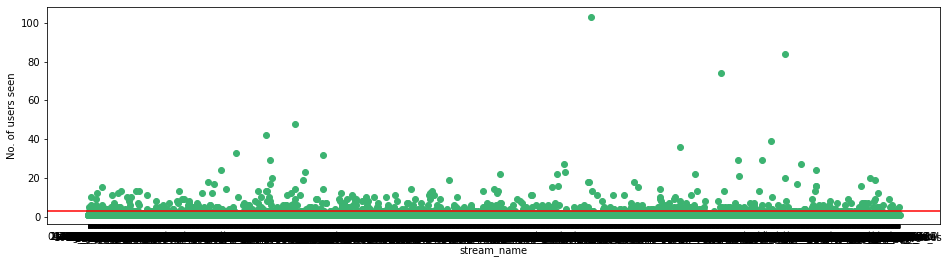

In [ ]:
#lets compare our thresholds with data
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=3,color='r')
plt.xlabel('stream_name')
plt.ylabel('No. of users seen')
plt.show()

In [ ]:
#Making the necessary modifications as per the threshold set
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 3].index,:]

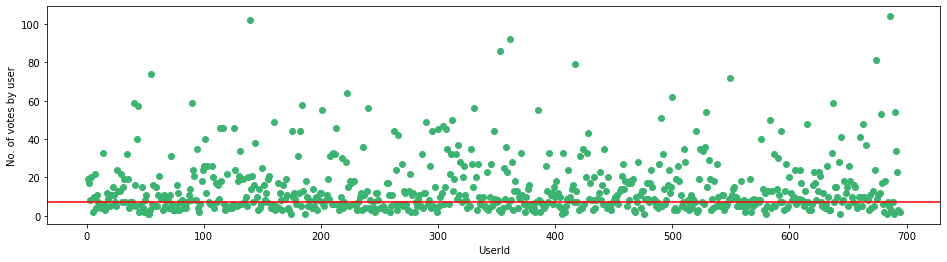

In [ ]:
#visualization of threshold 7
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=7,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [ ]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 7].index]
final_dataset

user_id,1,2,3,4,6,7,9,14,17,18,...,675,676,677,678,679,682,686,690,691,692
stream_name,,,,,,,,,,,,,,,,,,,,,
10000days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1drakonz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1mpala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1z99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2chamcham2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zerator,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zeusidiouss,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
zilioner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#now we apply csr matrix method to decrease sparsity
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [ ]:
final_dataset.shape

(461, 408)

In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)